# HR Analytics Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Checking Shape of data
df.shape

(1470, 35)

there are 1470 rows and 35 columns are there

In [4]:
# Checking Column Names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Checking the dataset at one glance by info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**As we can see from the output that the database is not having any null values and also it is having same type as that of the content type in the column**

In [6]:
# Analysisng the data by using the describe function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**As we can see that the columns which are continuous in nature only are having skewness present can be treated in preprocessing**

Countplot for  Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


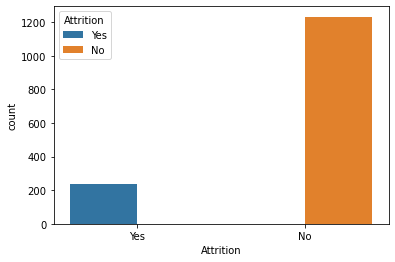

Countplot for  BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


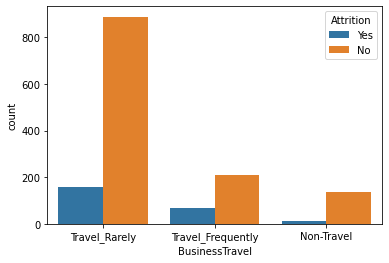

Countplot for  Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


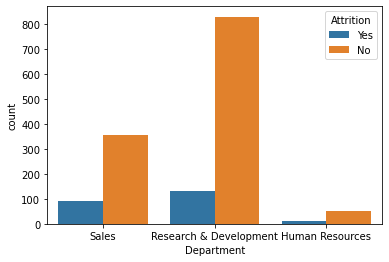

Countplot for  EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


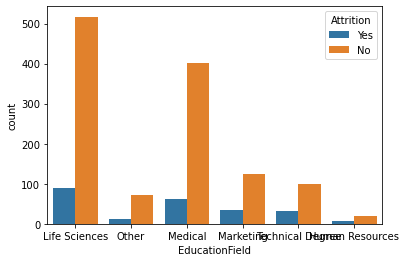

Countplot for  Gender
Male      882
Female    588
Name: Gender, dtype: int64


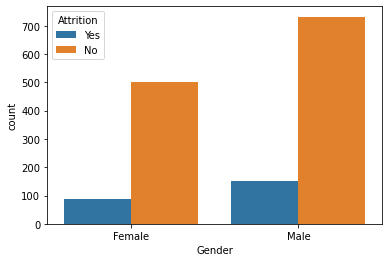

Countplot for  JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


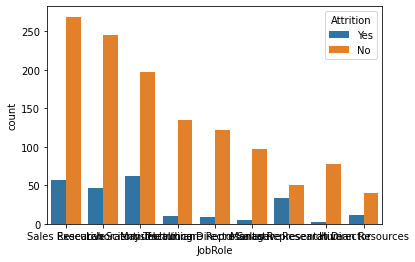

Countplot for  MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


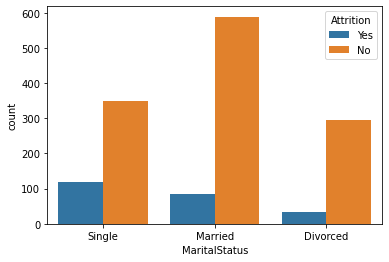

Countplot for  Over18
Y    1470
Name: Over18, dtype: int64


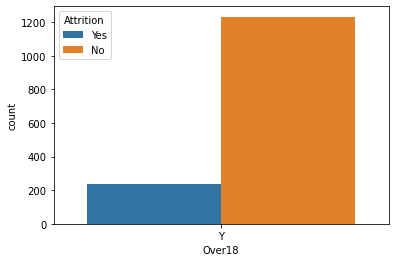

Countplot for  OverTime
No     1054
Yes     416
Name: OverTime, dtype: int64


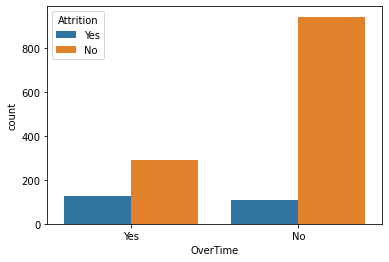

In [11]:
# Displaying Object tpe data by count plot
for i in df.columns:
    if df[i].dtypes=='object':
        print("Countplot for ", i)
        sns.countplot(x=df[i], hue=df['Attrition'])
        print(df[i].value_counts().sort_values(ascending=False))
        plt.show()

**Observation**
1.	It is seen that out of 1470, 237 people have change their jobs and 1233 are with the company
2.	The overall observation is people those haven’t change their jobs are more in any of the following comparison
3.	Business travel shows that the those were travelling rarely have higher % in both the category followed by the frequently travelled or non-travelers
4.	In the given database the total no. of Research and Development is higher hence the values of Attrition yes and no are also higher than compared to sales and HR
5.	The education background with Life Science, medical, technical, others and HR are having attrition rate in decreasing order
6.	882 male and 588 females are there in this company and as we can see that the % of male leaving company is more than the females 
7.	Married are more than singles and divorced, here we can note that the singles possess higher chances of leaving job
8.	All employees are above 18 years of Age
9.	Those who are doing the overtime has more chances of leaving 


Histplot for  Age


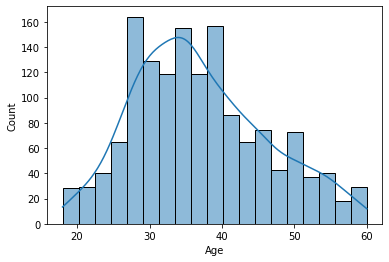

Histplot for  DailyRate


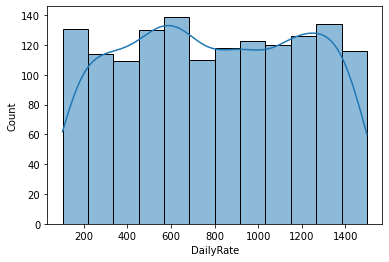

Histplot for  DistanceFromHome


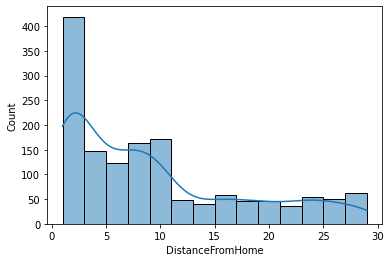

Histplot for  Education


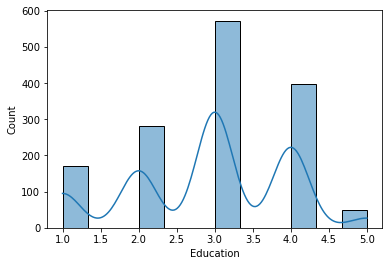

Histplot for  EmployeeCount


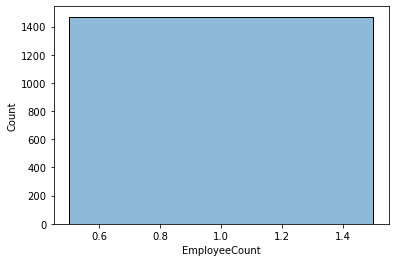

Histplot for  EmployeeNumber


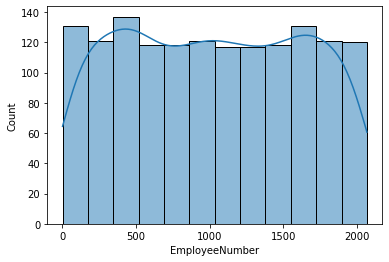

Histplot for  EnvironmentSatisfaction


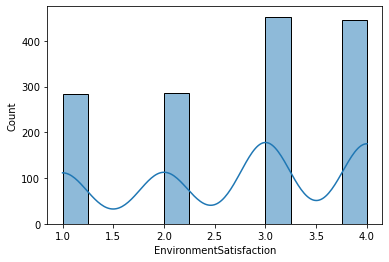

Histplot for  HourlyRate


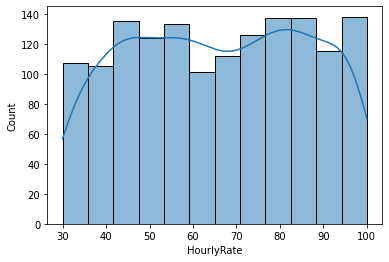

Histplot for  JobInvolvement


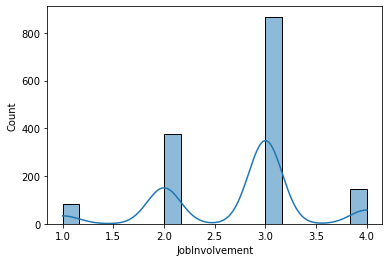

Histplot for  JobLevel


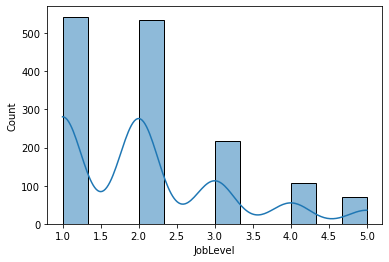

Histplot for  JobSatisfaction


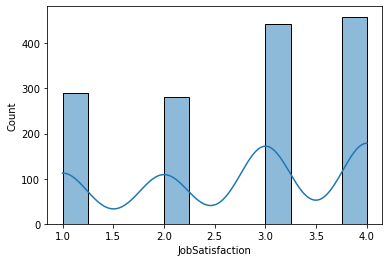

Histplot for  MonthlyIncome


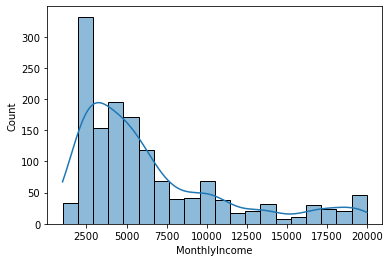

Histplot for  MonthlyRate


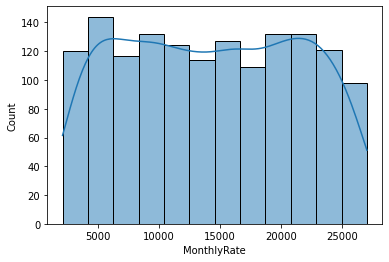

Histplot for  NumCompaniesWorked


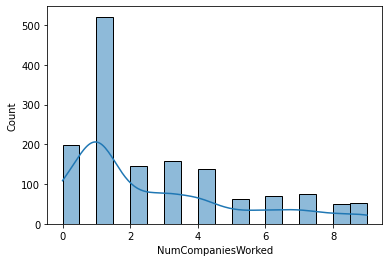

Histplot for  PercentSalaryHike


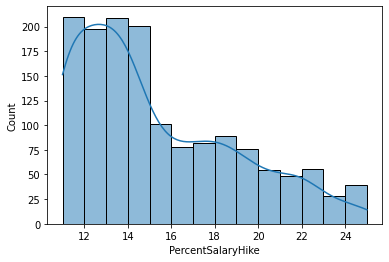

Histplot for  PerformanceRating


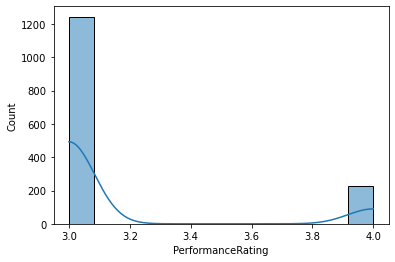

Histplot for  RelationshipSatisfaction


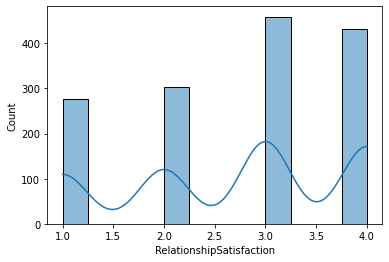

Histplot for  StandardHours


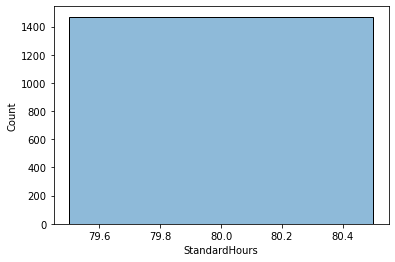

Histplot for  StockOptionLevel


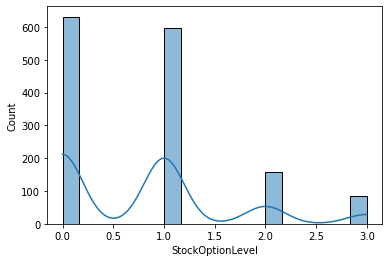

Histplot for  TotalWorkingYears


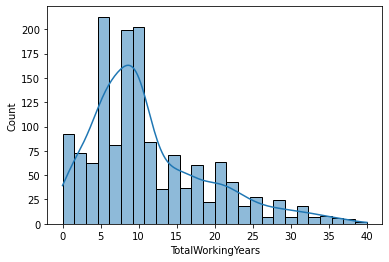

Histplot for  TrainingTimesLastYear


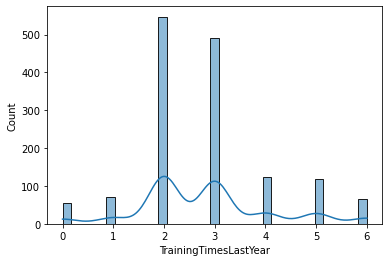

Histplot for  WorkLifeBalance


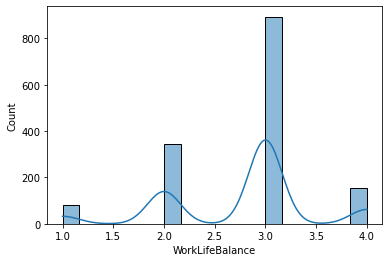

Histplot for  YearsAtCompany


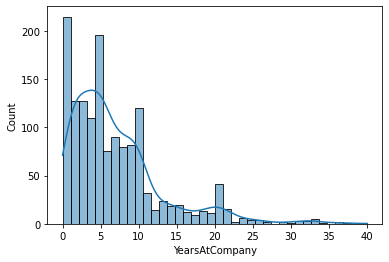

Histplot for  YearsInCurrentRole


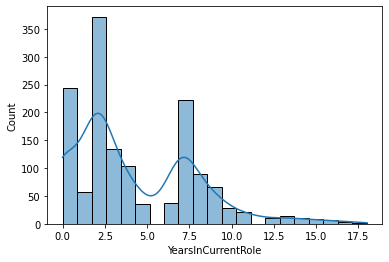

Histplot for  YearsSinceLastPromotion


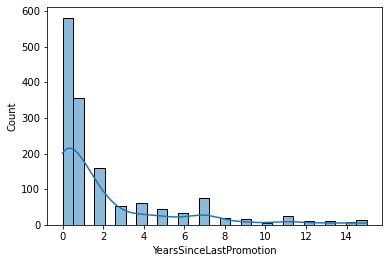

Histplot for  YearsWithCurrManager


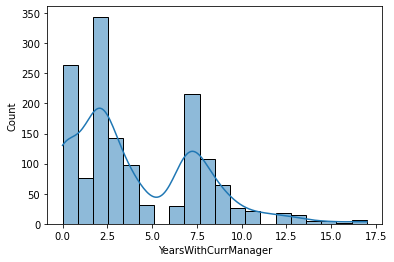

In [22]:
# Ploting Hist plot for continuous type of data
for i in df.columns:
    if df[i].dtypes!='object':
        print("Histplot for ", i)
        sns.histplot(data=df, x=i ,kde=True)
        plt.show()

**Observations**
1.	Age is slightly skewed towards right, age less than 35 are having more possibility to leave company
2.	Daily rate is not normally distributed 
3.	As the distance from the home is less the retention is high nobody wants to travel for job is right skewed highly
4.	As Employee count is one value for entire data we can vomit from database
5.	We can also drop employee no. column
6.	Hourly rate is also not normally distributed 
7.	Job involvement is higher
8.	Job level as low as possible
9.	Job satisfaction must be higher for retention
10.	Monthly income is positively skewed 
11.	No. of companies worked is also to be 
12.	% salary hike is positively skewed
13.	Relationship satisfaction should be there for retention
14.	The standard hours column to be removed as it is having only one value for all rows
15.	Total working years is also positively skewed
16.	Years at company is positively skewed
17.	Years In Current Role is positively skewed
18.	Years Since Last Promotion is positively skewed
19.	Years With Current Manager is positively skewed


In [26]:
# Checking the Skewness in the data
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

As we can see that the skewness in the data is very less, further treating for skewness 

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Education                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
EmployeeCount               AxesSubplot(0.656429,0.772143;0.110714x0.107857)
EmployeeNumber              AxesSubplot(0.789286,0.772143;0.110714x0.107857)
EnvironmentSatisfaction        AxesSubplot(0.125,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.257857,0.642714;0.110714x0.107857)
JobInvolvement              AxesSubplot(0.390714,0.642714;0.110714x0.107857)
JobLevel                    AxesSubplot(0.523571,0.642714;0.110714x0.107857)
JobSatisfaction             AxesSubplot(0.656429,0.642714;0.110714x0.107857)
MonthlyIncome               AxesSubplot(0.789286,0.642714;0.110714x0.107857)
MonthlyRate                    AxesSubplot(0.125,0.513286;0.110714x0.107857)

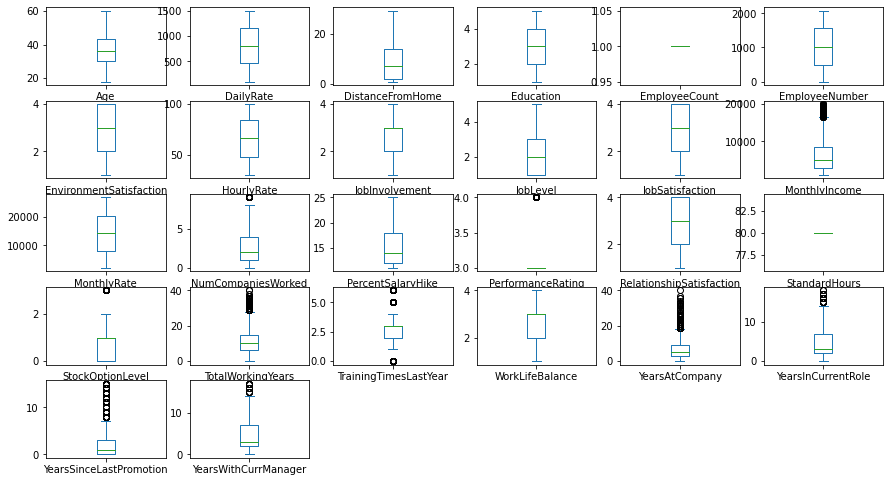

In [25]:
# Checking outliers in the dataset
df.plot(kind='box', subplots=True, layout=(6,6),figsize=(15,10))

As we can see that there are some outliers in columns can be trated furthermore in Preprocessing data

# Preprocessing the data

In [13]:
#Droping the Columns as discusse earlier
df=df.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [14]:
# Converting the Categorical column in coding by label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = le.fit_transform(df[i])
df
        

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [15]:
# Checking Correlation of Matrix
corr_mat=df.corr()
corr_mat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

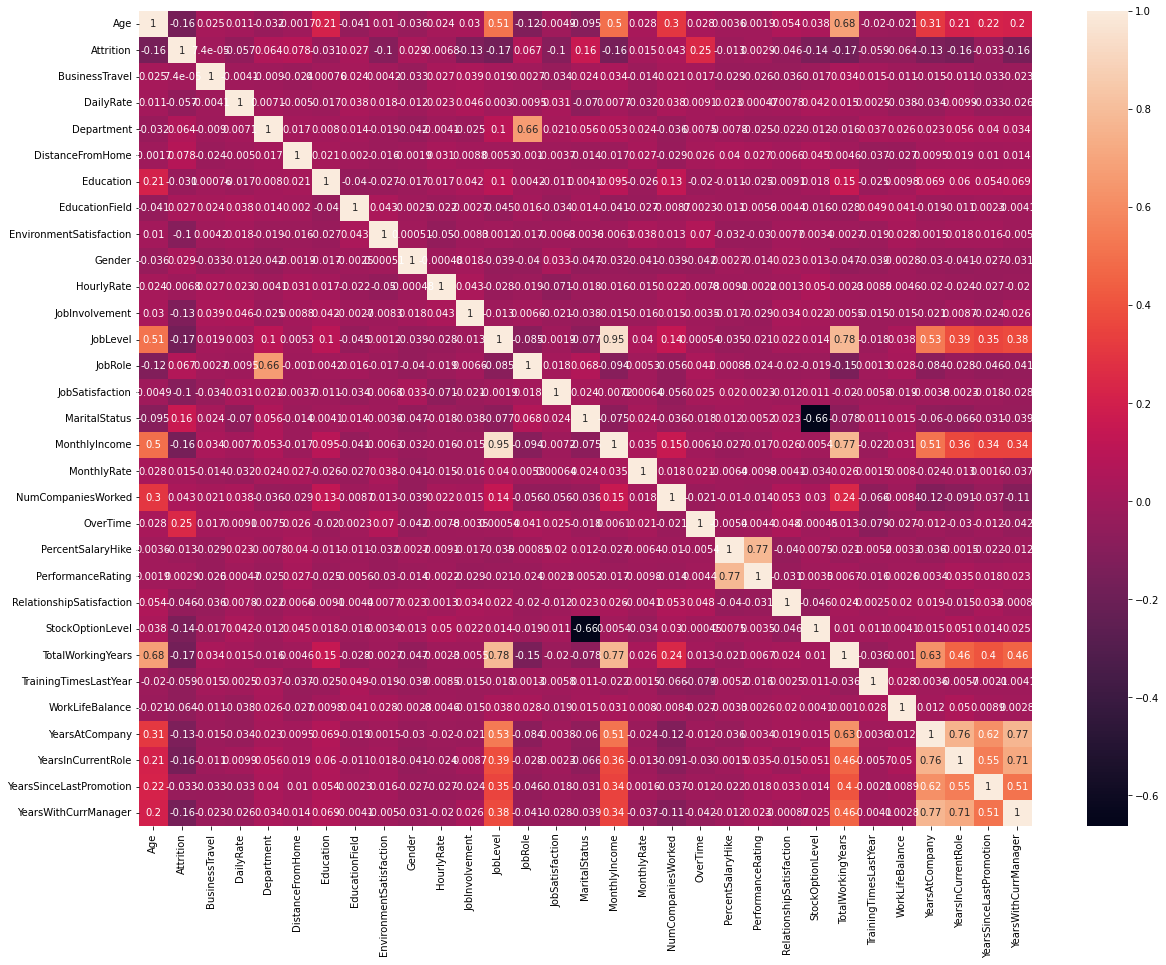

In [16]:
# Plotting the Heatmap for correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True)

**Observation**
As we can see that the all the parameters have very low bonding with the target variable attrition

**Dealing with Outliers**


In [17]:
# importing the zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1470, 31)

In [18]:
# Setting threshold at 3 and detecting the outliers
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [19]:
# Removing the outlier 
df=df[(z<3).all(axis=1)]
df.shape

(1387, 31)

In [20]:
#calculating loss
loss=(1470-1387)/1470*100
loss

5.646258503401361

**As the loss of data is only 5.64% we can re,ove the outliers and Proceed Further**

In [22]:
#separetingthe database into x and y

x=df.drop(['Attrition'],axis=1)
Y=df['Attrition']
print(x.shape)
Y.shape

(1387, 30)


(1387,)

In [23]:
# Removing Skewness Using Power Transform
from sklearn.preprocessing import power_transform
X=power_transform(x, method='yeo-johnson')
X

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [24]:
#checking for skewness is removed or not
skew_df=pd.DataFrame(X)
skew_df.skew()

0    -0.004079
1    -0.960583
2    -0.199742
3     0.015095
4    -0.008149
5    -0.103747
6    -0.008642
7    -0.205472
8    -0.417296
9    -0.105678
10   -0.018801
11    0.110769
12   -0.337641
13   -0.217730
14   -0.158253
15    0.027700
16   -0.176560
17    0.016175
18    0.954751
19    0.112128
20    0.000000
21   -0.191406
22    0.089929
23   -0.009666
24    0.057949
25   -0.011133
26   -0.025230
27   -0.069631
28    0.212301
29   -0.070570
dtype: float64

As we can see that the skewness is being removed from the data and now data is nearer to 0

In [25]:
#importing the StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [26]:
#importing the VIF in jupyter
from statsmodels.stats.outliers_influence import variance_inflation_factor
new_df=pd.DataFrame(X)
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = new_df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
    return VIF_Scores
df1 = new_df
vif_scores(df1)

,Independent Features,VIF Scores
0,0,1.931701
1,1,1.014400
2,2,1.026448
3,3,2.172485
4,4,1.017545
5,5,1.065983
6,6,1.030483
7,7,1.024570
8,8,1.024895
9,9,1.024263


**Observation**
As we can see that the VIF is below 6 which is under considerable range hence Proceeding further 

**Balancing the dataset for modelling**

In [51]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

As we can see that the classes are imbalance hence balancing them by SMOTE

In [52]:
# Importing Libraries for it 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

**Modeling the data**

In [53]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lg=LogisticRegression()

In [54]:
# Finding the random state
maxaccu=0
maxrs=0
for i in range(1,100):
    print("At Random State ", i)
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.20, random_state=i)
    lg.fit(Xtrain,Ytrain)
    predlg=lg.predict(Xtest)
    trainlg=lg.predict(Xtrain)
    acc=accuracy_score(Ytest,predlg)
    accu=accuracy_score(Ytrain,trainlg)
    print('testing accuracy', acc, 'randon state',i)
    print('Training Accuracy', accu, 'random state', i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', i)

At Random State  1
testing accuracy 0.8038793103448276 randon state 1
Training Accuracy 0.7980561555075594 random state 1
max accuracy 0.8038793103448276 max_random_state 1
At Random State  2
testing accuracy 0.7931034482758621 randon state 2
Training Accuracy 0.7991360691144709 random state 2
At Random State  3
testing accuracy 0.7823275862068966 randon state 3
Training Accuracy 0.800755939524838 random state 3
At Random State  4
testing accuracy 0.7586206896551724 randon state 4
Training Accuracy 0.8110151187904968 random state 4
At Random State  5
testing accuracy 0.7693965517241379 randon state 5
Training Accuracy 0.8110151187904968 random state 5
At Random State  6
testing accuracy 0.8081896551724138 randon state 6
Training Accuracy 0.7948164146868251 random state 6
max accuracy 0.8081896551724138 max_random_state 6
At Random State  7
testing accuracy 0.8038793103448276 randon state 7
Training Accuracy 0.7996760259179265 random state 7
At Random State  8
testing accuracy 0.8103448

In [55]:
# Checking for the Max. Accuracy at Random State
print('max accuracy', maxaccu , 'max_random_state', i)

max accuracy 0.8275862068965517 max_random_state 99


In [59]:
# train test split for the data with suggested random state
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=34)

In [60]:
# Checking score again for the the lr model 
lg=LogisticRegression()
lg.fit(X_train,Y_train)
predlg=lg.predict(X_test)
predtrain=lg.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predlg))
print(confusion_matrix(Y_test,predlg))
print(classification_report(Y_test,predlg))

Training accuracy is  0.7861771058315334
0.8275862068965517
[[195  38]
 [ 42 189]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       233
           1       0.83      0.82      0.83       231

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464



In [61]:
#AUC ROC Curve
# Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

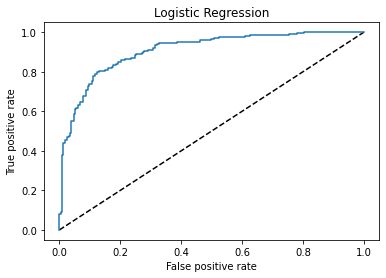

0.8275458447132268

In [62]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(Y_test,lg.predict(X_test))

auc_score

In [63]:
# using DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)
predtrain=dtc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

Training accuracy is  1.0
0.8900862068965517
[[204  29]
 [ 22 209]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       233
           1       0.88      0.90      0.89       231

    accuracy                           0.89       464
   macro avg       0.89      0.89      0.89       464
weighted avg       0.89      0.89      0.89       464



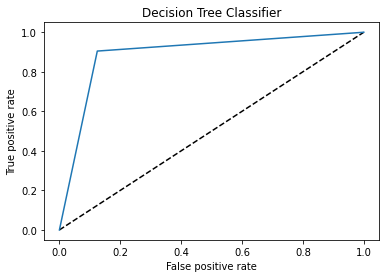

0.8901491927243

In [64]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=dtc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

auc_score

In [65]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predrf=rf.predict(X_test)
predtrain=rf.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predrf))
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))

Training accuracy is  1.0
0.9418103448275862
[[227   6]
 [ 21 210]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       233
           1       0.97      0.91      0.94       231

    accuracy                           0.94       464
   macro avg       0.94      0.94      0.94       464
weighted avg       0.94      0.94      0.94       464



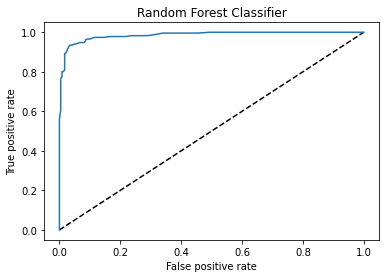

0.941669918064768

In [66]:
#AUC ROC curve for Random Forest Classifier Classifier
Y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,rf.predict(X_test))

auc_score

In [67]:
# Using SVC
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
predtrain=svc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

Training accuracy is  0.9692224622030238
0.9267241379310345
[[212  21]
 [ 13 218]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       233
           1       0.91      0.94      0.93       231

    accuracy                           0.93       464
   macro avg       0.93      0.93      0.93       464
weighted avg       0.93      0.93      0.93       464



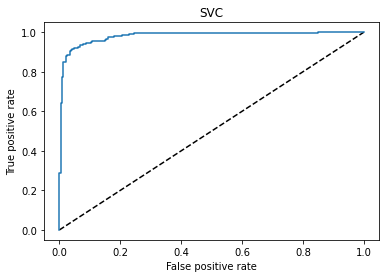

0.9267970941790684

In [68]:
#AUC ROC curve for  SVC
Y_pred_prob=svc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC')
plt.show()

auc_score=roc_auc_score(Y_test,svc.predict(X_test))

auc_score

In [69]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predknn))
print(confusion_matrix(Y_test,predknn))
print(classification_report(Y_test,predknn))

Training accuracy is  0.8482721382289417
0.8146551724137931
[[150  83]
 [  3 228]]
              precision    recall  f1-score   support

           0       0.98      0.64      0.78       233
           1       0.73      0.99      0.84       231

    accuracy                           0.81       464
   macro avg       0.86      0.82      0.81       464
weighted avg       0.86      0.81      0.81       464



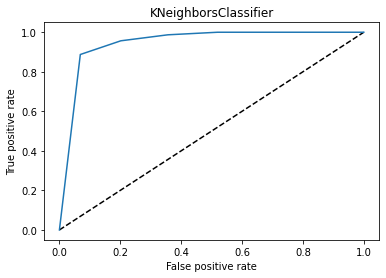

0.8153949055236609

In [70]:
#AUC ROC curve for  KNeighborsClassifier
Y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,knn.predict(X_test))

auc_score

In [71]:
# Using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()
xgb.fit(X_train,Y_train)
predxgb=xgb.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predxgb))
print(confusion_matrix(Y_test,predxgb))
print(classification_report(Y_test,predxgb))

Training accuracy is  0.8482721382289417
0.9245689655172413
[[222  11]
 [ 24 207]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       233
           1       0.95      0.90      0.92       231

    accuracy                           0.92       464
   macro avg       0.93      0.92      0.92       464
weighted avg       0.93      0.92      0.92       464



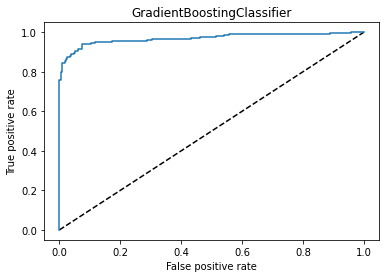

0.9244467978373558

In [72]:
#AUC ROC curve for  GradientBoostingClassifier
Y_pred_prob=xgb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,xgb.predict(X_test))

auc_score

In [73]:
# using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
predada=ada.predict(X_test)
predtrain=ada.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predada))
print(confusion_matrix(Y_test,predada))
print(classification_report(Y_test,predada))

Training accuracy is  0.9292656587473002
0.915948275862069
[[214  19]
 [ 20 211]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       233
           1       0.92      0.91      0.92       231

    accuracy                           0.92       464
   macro avg       0.92      0.92      0.92       464
weighted avg       0.92      0.92      0.92       464



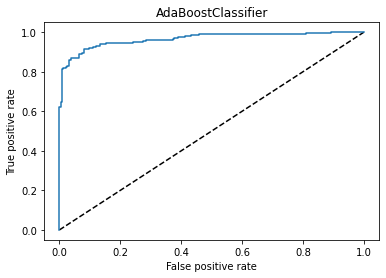

0.9159374245211156

In [74]:
#AUC ROC curve for  AdaBoostClassifier
Y_pred_prob=ada.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,ada.predict(X_test))

auc_score

In [75]:
# Using Naive bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predgnb = gnb.predict(X_test)
predtrain=gnb.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predgnb))
print(confusion_matrix(Y_test,predgnb))
print(classification_report(Y_test,predgnb))

Training accuracy is  0.730561555075594
0.7413793103448276
[[178  55]
 [ 65 166]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       233
           1       0.75      0.72      0.73       231

    accuracy                           0.74       464
   macro avg       0.74      0.74      0.74       464
weighted avg       0.74      0.74      0.74       464



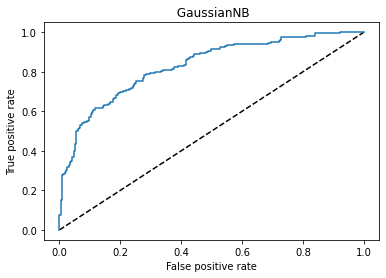

0.7412816082343979

In [76]:
#AUC ROC curve for  GaussianNB
Y_pred_prob=gnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(' GaussianNB')
plt.show()

auc_score=roc_auc_score(Y_test,gnb.predict(X_test))

auc_score

In [78]:
from sklearn.model_selection import cross_val_score

# validation accuracy

model=[lg,dtc,rf,knn,xgb,ada,gnb,svc]

for i in model:
    for j in range(2,10):
        print('taking cv =', j)
        cr_score=cross_val_score(i, X, Y, cv=j)
        print('Cross validation score for ' , i ,' is', cr_score)
        print('Mean of Cross Val. score is ', cr_score.mean())


taking cv = 2
Cross validation score for  LogisticRegression()  is [0.78151986 0.79533679]
Mean of Cross Val. score is  0.7884283246977548
taking cv = 3
Cross validation score for  LogisticRegression()  is [0.79663212 0.79663212 0.79404145]
Mean of Cross Val. score is  0.7957685664939551
taking cv = 4
Cross validation score for  LogisticRegression()  is [0.79965458 0.78756477 0.80310881 0.79274611]
Mean of Cross Val. score is  0.7957685664939551
taking cv = 5
Cross validation score for  LogisticRegression()  is [0.79525862 0.79697624 0.81209503 0.76241901 0.79913607]
Mean of Cross Val. score is  0.7931769941163328
taking cv = 6
Cross validation score for  LogisticRegression()  is [0.80310881 0.79015544 0.78238342 0.81088083 0.7746114  0.79792746]
Mean of Cross Val. score is  0.7931778929188256
taking cv = 7
Cross validation score for  LogisticRegression()  is [0.80060423 0.80060423 0.79456193 0.80362538 0.78851964 0.7673716
 0.8030303 ]
Mean of Cross Val. score is  0.7940453302991067
t

**Cross val score for thr Random Forest Classifier at fold 8 is 0.94 with testing accuracy also at 0.94 hence selecting the CV=8 and random forest as the best model** 

Comparing the accuracy of all Models at fold 8, above conclusion can be drawn

**Further we can do the Hyper parameter tunning to get best parameters and estimator**

**Hyper Parameter Tunning**

In [92]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to be passed in GridSearchCV
parameters = {
 'max_depth': [30,40],
 'max_features': ['auto', 'sqrt','log2'],
 'n_estimators': [200,300,400,500]
    
} 

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=8,
                scoring='accuracy')

In [93]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='accuracy')

In [94]:
GCV.best_params_

{'max_depth': 40, 'max_features': 'log2', 'n_estimators': 500}

In [95]:
# Checking score with best parameter
final_model=RandomForestClassifier(max_depth=40,max_features='log2',n_estimators=500)
final_model.fit(X_train,Y_train)
predfinal=final_model.predict(X_test)
print('Final Accuracy is with Random Forest Classifier = ',accuracy_score(Y_test,predfinal))

Final Accuracy is with Random Forest Classifier =  0.9482758620689655


<function matplotlib.pyplot.show(close=None, block=None)>

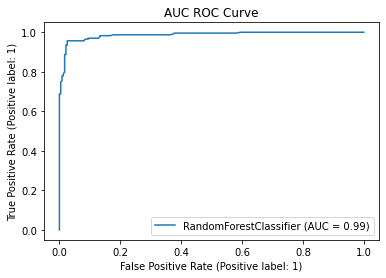

In [96]:
#AUC ROC of Best Estimator
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title('AUC ROC Curve')
plt.show

In [98]:
# Saving the Model
import joblib
joblib.dump(GCV.best_estimator_, "HR Analytics.pkl")

['HR Analytics.pkl']

In [99]:
# Conclusion
a=np.array(Y_test)
predicted=np.array(predfinal)
df_con=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))
df_con

,Original,Predicted
0,1,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
459,1,1
460,1,1
461,0,0
462,1,1
